In [1]:
## Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
## Reading train and test data
df_train = pd.read_csv("train_cab.csv")
#df_test = pd.read_csv("test.csv")
print("The shape of training data : {}".format(df_train.shape))
#print("The shape of test data : {}".format(df_test.shape))

The shape of training data : (16067, 7)


In [3]:
## missing value
missing_val = pd.DataFrame(df_train.isnull().sum())
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_count'})
missing_val = missing_val.sort_values('Missing_count', ascending = False).reset_index(drop = True)
missing_val

,Variables,Missing_count
0,passenger_count,55
1,fare_amount,24
2,pickup_datetime,0
3,pickup_longitude,0
4,pickup_latitude,0
5,dropoff_longitude,0
6,dropoff_latitude,0


In [4]:
### "fare_amount" is our target variable.
## We have 24 observations having values 'NA' so we drop these values.

df_train.dropna(axis=0,how="any",subset=['fare_amount'],inplace=True)
df_train.shape

(16043, 7)

In [5]:
## As we have total of 16043 observation , and a missing observation 55 from "passenger_count" which is approx 0.34 %.
## So I drop these observation, inplace of imputing them by mean,median or KNN imputaion.

df_train.dropna(axis=0,how="any",subset=['passenger_count'],inplace=True)
df_train.shape

(15988, 7)

In [11]:
#df_train['passenger_count'].value_counts()

In [6]:
##So finally,
df_train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

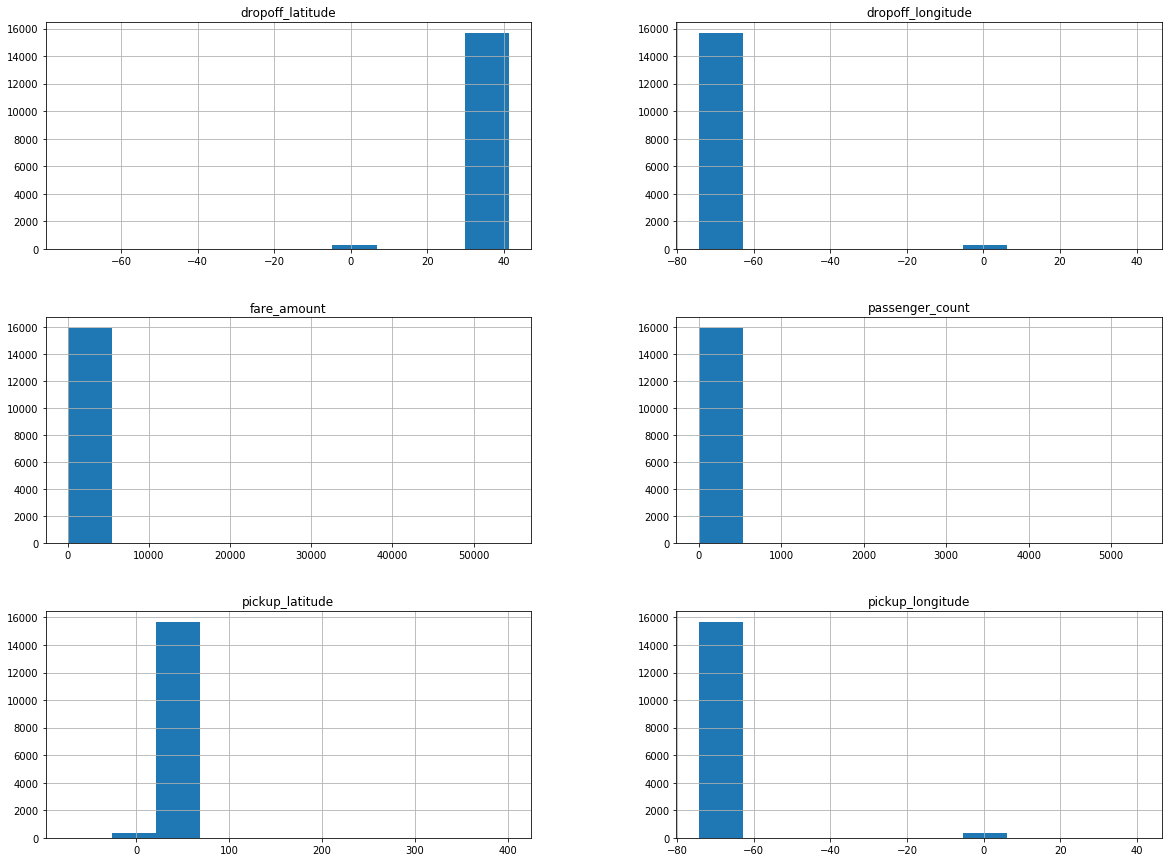

In [7]:
## Histogram plot
df_train.hist(figsize=(20,15))
plt.show()

In [28]:
df_train.describe(include="all")

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15988.000000,15988,15988.000000,15988.000000,15988.000000,15988.000000,15988.000000
unique,NaN,15943,NaN,NaN,NaN,NaN,NaN
top,NaN,2013-01-11 12:28:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,NaN,NaN
mean,15.056187,NaN,-72.464541,39.915681,-72.464099,39.898780,2.623069
std,431.199461,NaN,10.572946,6.828608,10.569608,6.185996,60.888334
min,-3.000000,NaN,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,NaN,-73.992143,40.734931,-73.991182,40.734655,1.000000
50%,8.500000,NaN,-73.981691,40.752603,-73.980168,40.753560,1.000000
75%,12.500000,NaN,-73.966822,40.767356,-73.963645,40.768006,2.000000


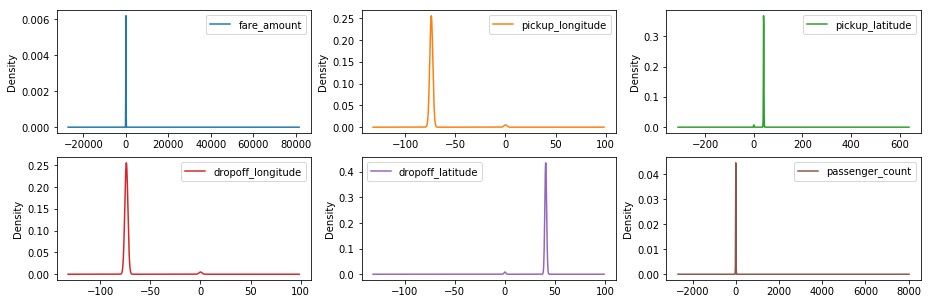

In [29]:
df_train.plot(kind='density', subplots=True, layout=(8,3), sharex=False)
plt.subplots_adjust(left=0, bottom=1, right=2, top= 5,wspace=0.2, hspace=0.2)
plt.show()

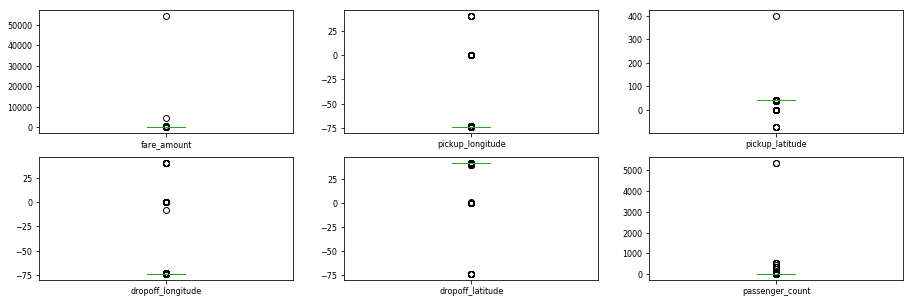

In [30]:
df_train.plot(kind='box', subplots=True, layout=(8,3), sharex=False, sharey=False, fontsize=8)
plt.subplots_adjust(left=0, bottom=1, right=2, top= 5,wspace=0.2, hspace=0.2)
plt.show()

In [71]:
## by observing the data we came to know mininmum value of 'fare_amount' is negative, which is not pratical.
## So we remove those observation from data.
df_train = df_train[df_train['fare_amount']>0]

In [72]:
## Let's focus on longitude and latitude.
print("The maximum pickup_longitude:{}".format(max(df_train['pickup_longitude'])))
print("The minimum pickup_longitude:{}".format(min(df_train['pickup_longitude'])))
print("The maximum dropoff_longitude:{}".format(max(df_train['dropoff_longitude'])))
print("The mimimum dropoff_longitude:{}".format(min(df_train['dropoff_longitude'])))
print(" ")
print("The maximum pickup_latitude:{}".format(max(df_train['pickup_latitude'])))
print("The minimum pickup_latitude:{}".format(min(df_train['pickup_latitude'])))
print("The maximum dropoff_latitude:{}".format(max(df_train['dropoff_latitude'])))
print("The mimimum dropoff_latitude:{}".format(min(df_train['dropoff_latitude'])))

The maximum pickup_longitude:40.766125
The minimum pickup_longitude:-74.438233
The maximum dropoff_longitude:40.802437
The mimimum dropoff_longitude:-74.42933199999999
 
The maximum pickup_latitude:401.083332
The minimum pickup_latitude:-74.006893
The maximum dropoff_latitude:41.366138
The mimimum dropoff_latitude:-74.006377


In [33]:
import folium
wmap = folium.Map(location=[41.366138, -74.42933199999999] ,zoom_start=6)
wmap



In [73]:
### from above observation we came to know that coordinates is belongs to NEW YORK.
## So,

# our latitude and longitude should not be equal to 0 becuase the dataset is based in NY
df_train = df_train[df_train['pickup_latitude']!= 0]
df_train = df_train[df_train['pickup_longitude'] != 0]
df_train = df_train[df_train['dropoff_latitude'] != 0]
df_train = df_train[df_train['dropoff_longitude'] != 0]


# latitude and longitude are bounded by 90 and -90. We shouldnt have any coordiantes out of that range
df_train = df_train[(df_train['pickup_latitude']<=90) & (df_train['pickup_latitude']>=-90)]
df_train = df_train[(df_train['pickup_longitude']<=90) & (df_train['pickup_longitude']>=-90)]
df_train = df_train[(df_train['dropoff_latitude']<=90) & (df_train['dropoff_latitude']>=-90)]
df_train = df_train[(df_train['dropoff_longitude']<=90) & (df_train['dropoff_longitude']>=-90)]

# I dont want to include destinations that have not moved from there pickup coordinates to there dropoff coordinates
df_train = df_train[(df_train['pickup_latitude'] != df_train['dropoff_latitude']) & (df_train['pickup_longitude'] != df_train['dropoff_longitude'])]

df_train.shape

(15499, 7)

In [74]:
df_train['passenger_count'] = df_train['passenger_count'].astype('int64')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15499 entries, 4 to 16042
Data columns (total 7 columns):
fare_amount          15499 non-null float64
pickup_datetime      15499 non-null object
pickup_longitude     15499 non-null float64
pickup_latitude      15499 non-null float64
dropoff_longitude    15499 non-null float64
dropoff_latitude     15499 non-null float64
passenger_count      15499 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 968.7+ KB


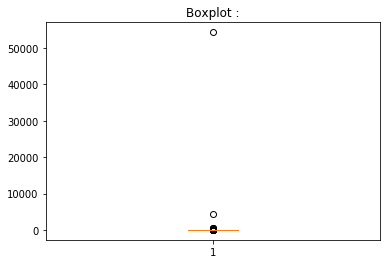

In [36]:
### outlier analysis for target variable "fare_amount":
cname = ['fare_amount']
for i in cname:
    plt.boxplot(df_train[i])
    plt.title("Boxplot :"+str())
    plt.show()

In [75]:
## Detect and count outlier
for i in cname:
    q75,q25 = np.percentile(df_train.loc[:,i],[75,25])
    # Calculating Interquartile range
    iqr = (q75 - q25)
    # Calculating upper extrema and lower extrema
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    # Replace with NA
    df_train.loc[df_train[i] < minimum,i] = np.nan
    df_train.loc[df_train[i] > maximum,i] = np.nan

In [39]:
df_train.isnull().sum()

fare_amount          1348
pickup_datetime         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
passenger_count         0
dtype: int64

In [76]:
###  1348 outler in target variable "fare_amount".
### So we are first going to drop outlier from target variable "fare_amount"
df_train.dropna(axis=0,how="any",subset=['fare_amount'],inplace=True)

In [77]:
### analysis for variable "passenger_count"
df_train['passenger_count'].value_counts()

1       9985
2       2015
5        924
3        594
4        293
6        271
0         52
43         2
354        1
456        1
536        1
345        1
537        1
58         1
535        1
554        1
87         1
531        1
5345       1
5334       1
53         1
557        1
35         1
Name: passenger_count, dtype: int64

In [78]:
# Maximum amaount of passengers in a car should be 7, but the occurance of 7 passenger is by far too low to include
df_train = df_train[(df_train['passenger_count'] < 7) & (df_train['passenger_count'] > 0)]
df_train.shape

(14082, 7)

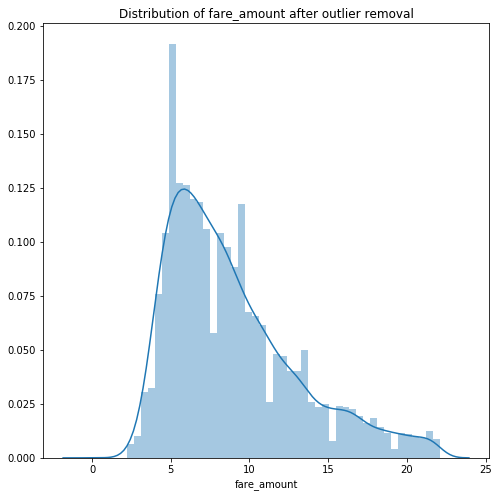

In [79]:
## Distribution of "fare_amount" after outlier removal
plt.figure(figsize=(8,8))
sns.distplot(df_train['fare_amount'])
plt.title("Distribution of fare_amount after outlier removal")
plt.show()

## Exploratory Analysis

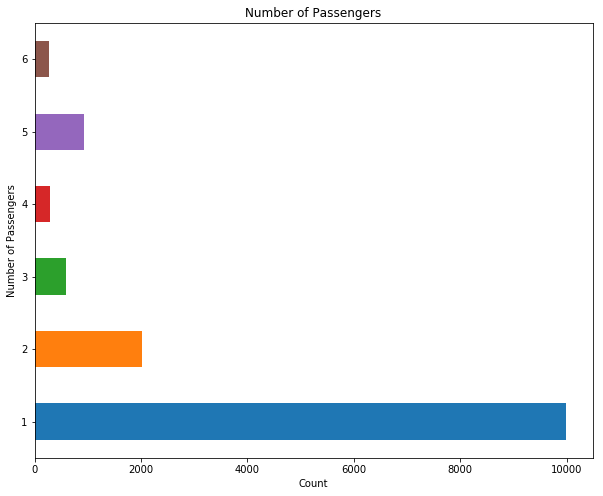

In [44]:
passenger_count = df_train.groupby('passenger_count')['fare_amount'].count()
passenger_count.reset_index()
passenger_count.plot(kind="barh",x= 'passenger_count',y= 'fare_amount',figsize=(10,8))
plt.xlabel('Count')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers')
plt.show()

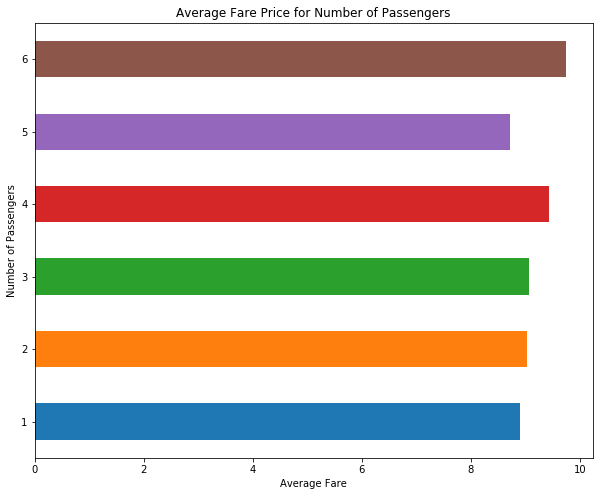

In [45]:
passenger_fare = df_train.groupby("passenger_count")['fare_amount'].mean()
passenger_fare.reset_index()
passenger_fare.plot(kind="barh",x="passenger_count",y="fare_amount",figsize=(10,8))
plt.xlabel('Average Fare')
plt.ylabel('Number of Passengers')
plt.title('Average Fare Price for Number of Passengers')
plt.show()

In [80]:
### Convert pickup_datetime from object to datetime object
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'],format="%Y-%m-%d %H:%M:%S UTC",errors="coerce")

In [81]:
df_train['pickup_day'] = df_train['pickup_datetime'].dt.day
df_train['pickup_hour'] = df_train['pickup_datetime'].dt.hour
df_train['pickup_day_of_week'] = df_train['pickup_datetime'].dt.dayofweek ###The day of the week with Monday=0, Sunday=6
df_train['pickup_month'] = df_train['pickup_datetime'].dt.month
df_train['pickup_year'] =df_train['pickup_datetime'].dt.year

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14082 entries, 4 to 14644
Data columns (total 12 columns):
fare_amount           14082 non-null float64
pickup_datetime       14081 non-null datetime64[ns]
pickup_longitude      14082 non-null float64
pickup_latitude       14082 non-null float64
dropoff_longitude     14082 non-null float64
dropoff_latitude      14082 non-null float64
passenger_count       14082 non-null int64
pickup_day            14081 non-null float64
pickup_hour           14081 non-null float64
pickup_day_of_week    14081 non-null float64
pickup_month          14081 non-null float64
pickup_year           14081 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 1.4 MB


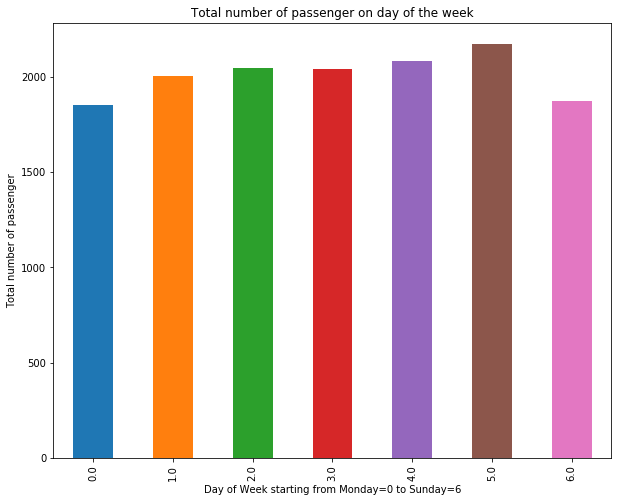

In [82]:
df_dayofweek = df_train.groupby('pickup_day_of_week')['passenger_count'].count()
df_dayofweek.reset_index()
df_dayofweek.plot(kind="bar",x="pickup_day_of_week",y="passenger_count",figsize=(10,8))
plt.xlabel("Day of Week starting from Monday=0 to Sunday=6")
plt.ylabel("Total number of passenger")
plt.title("Total number of passenger on day of the week")
plt.show()

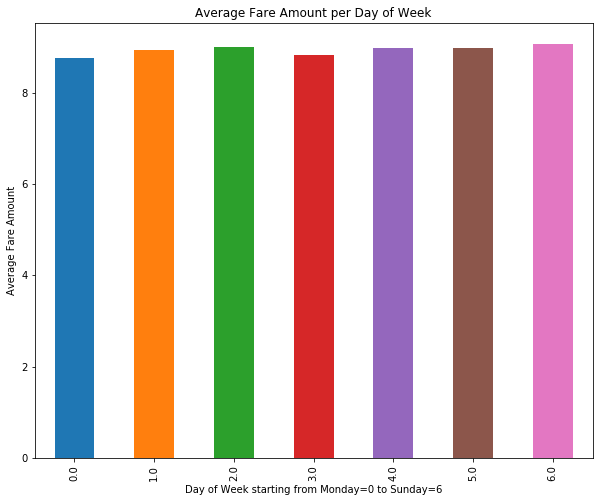

In [50]:
dayofweek_fare = df_train.groupby("pickup_day_of_week")['fare_amount'].mean()
dayofweek_fare.reset_index()
dayofweek_fare.plot(kind='bar',x="pickup_day_of_week",y='fare_amount',figsize=(10,8))
plt.xlabel("Day of Week starting from Monday=0 to Sunday=6")
plt.ylabel("Average Fare Amount")
plt.title("Average Fare Amount per Day of Week")
plt.show()

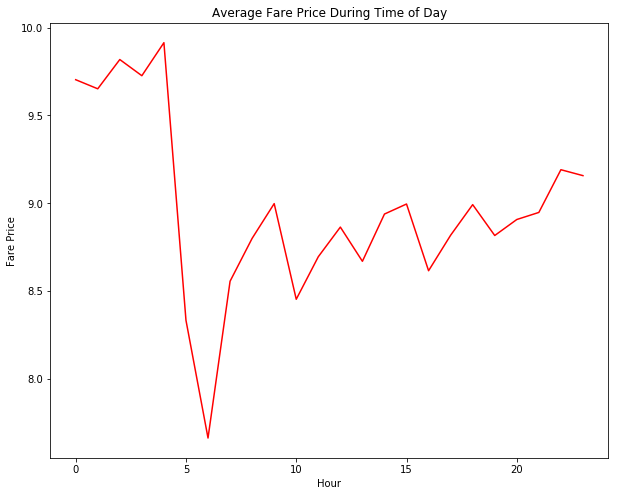

In [51]:
time_of_day = df_train.groupby(['pickup_hour']).mean()
plt.figure(figsize=(10,8))
plt.plot(time_of_day.index, time_of_day.fare_amount, color = 'r')
plt.xlabel('Hour')
plt.ylabel('Fare Price')
plt.title('Average Fare Price During Time of Day')
plt.show()

In [83]:
df_train_1 = df_train.copy()
df_train_1.dropna(axis=0,how="any",subset=['pickup_datetime'],inplace=True)

In [84]:
df_train_1 = df_train_1.drop(['pickup_datetime'],axis=1)
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14081 entries, 4 to 14644
Data columns (total 11 columns):
fare_amount           14081 non-null float64
pickup_longitude      14081 non-null float64
pickup_latitude       14081 non-null float64
dropoff_longitude     14081 non-null float64
dropoff_latitude      14081 non-null float64
passenger_count       14081 non-null int64
pickup_day            14081 non-null float64
pickup_hour           14081 non-null float64
pickup_day_of_week    14081 non-null float64
pickup_month          14081 non-null float64
pickup_year           14081 non-null float64
dtypes: float64(10), int64(1)
memory usage: 1.3 MB


In [85]:
def haversine_np(lon1,lat1,lon2,lat2):
    lon1,lat1,lon2,lat2 = map(np.radians, [lon1,lat1,lon2,lat2])
    dlon=lon2-lon1
    dlat=lat2-lat1
    a=np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c=2*np.arcsin(np.sqrt(a))
    km=6367*c
    return km

In [86]:
df_train_1['haversine_dist']= haversine_np(df_train_1.pickup_longitude, df_train_1.pickup_latitude, df_train_1.dropoff_longitude, df_train_1.dropoff_latitude).astype('float')

In [87]:
df_train_1.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,haversine_dist
4,0.01,-73.939041,40.713963,-73.941673,40.713997,1,1.0,15.0,4.0,5.0,2015.0,0.221738
5,1.14,-73.862829,40.769014,-73.982075,40.723854,1,31.0,15.0,5.0,5.0,2014.0,11.223636
6,2.50,-73.989142,40.720105,-73.988777,40.720662,1,29.0,3.0,3.0,3.0,2012.0,0.069110
11,2.50,-73.959008,40.712517,-73.959132,40.712184,1,28.0,23.0,1.0,8.0,2012.0,0.038450
14,2.50,-73.975013,40.782961,-73.975076,40.782875,1,11.0,8.0,3.0,4.0,2013.0,0.010929


### Feature Selection

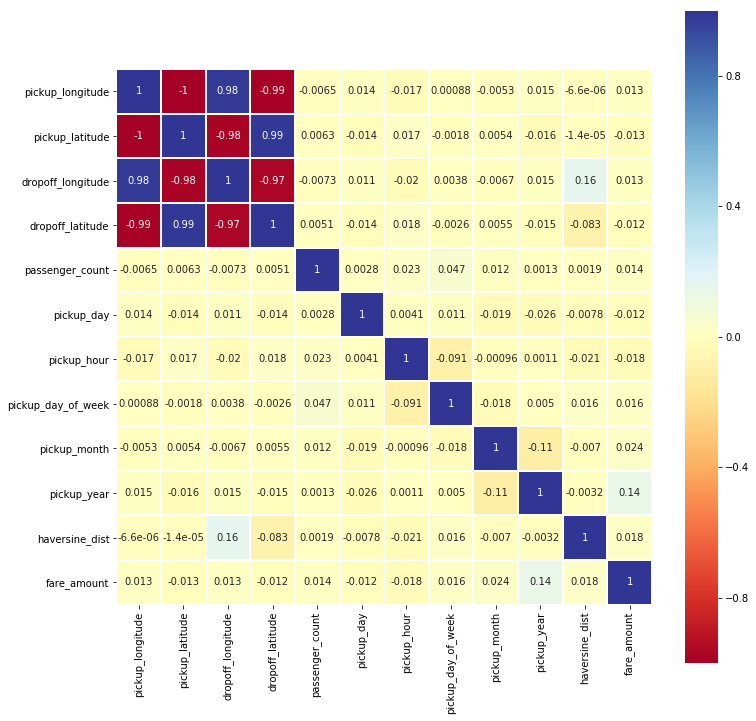

In [91]:
## feature selection for numerical variable
#let us see the correlation
num_var = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',
           'passenger_count','pickup_day','pickup_hour','pickup_day_of_week',
           'pickup_month','pickup_year','haversine_dist','fare_amount']
data_corr=df_train_1.loc[:,num_var]

# Correlation matrix

#generating correlation matrix
corr=data_corr.corr()

#Setting up the pane or matrix size
f, ax = plt.subplots(figsize=(12,12)) 

## Plot heatmap using Seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="RdYlBu",
            square=True, ax=ax,annot=True,linewidths=1)

### Sampling

In [93]:
X = df_train_1[['pickup_longitude','pickup_latitude','passenger_count','pickup_day','pickup_hour','pickup_day_of_week','pickup_month','pickup_year','haversine_dist']].values
Y = df_train_1['fare_amount'].values

In [94]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

### Modelling

#### Linear Regression

In [130]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [131]:
lm_predict  = lm.predict(x_test)

In [132]:
## Metrics Evaluation
from math import sqrt
from sklearn.metrics import mean_squared_error
print("Linear Regression RMSE: {} ".format(sqrt(mean_squared_error(y_test,lm_predict))))

Linear Regression RMSE: 4.0688726023890345 


#### Decision Tree Regression

In [98]:
def DT(depth):
    dt = DecisionTreeRegressor(max_depth = depth,random_state = 42)
    dt.fit(x_train,y_train)
    pred = dt.predict(x_test)
    print("depth : {} --- Decision Tree RMSE : {}".format(depth,sqrt(mean_squared_error(y_test,pred))))

In [99]:
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,None]:
    DT(i)

depth : 1 --- Decision Tree RMSE : 2.961078826410373
depth : 2 --- Decision Tree RMSE : 2.5528579848407653
depth : 3 --- Decision Tree RMSE : 2.4300423091994516
depth : 4 --- Decision Tree RMSE : 2.3377105578755666
depth : 5 --- Decision Tree RMSE : 2.301535673114662
depth : 6 --- Decision Tree RMSE : 2.271276793236065
depth : 7 --- Decision Tree RMSE : 2.2985792116908
depth : 8 --- Decision Tree RMSE : 2.362628245153837
depth : 9 --- Decision Tree RMSE : 2.4270973106949896
depth : 10 --- Decision Tree RMSE : 2.582470403621639
depth : 11 --- Decision Tree RMSE : 2.6322183389323164
depth : 12 --- Decision Tree RMSE : 2.754761716462991
depth : 13 --- Decision Tree RMSE : 2.8001731194563346
depth : 14 --- Decision Tree RMSE : 2.960537556585026
depth : 15 --- Decision Tree RMSE : 2.951389190761407
depth : None --- Decision Tree RMSE : 3.100101713722916


In [100]:
dt_model = DecisionTreeRegressor(max_depth=6, random_state=42)
dt_model.fit(x_train,y_train)
dt_pred = dt_model.predict(x_test)
print("Decision Tree RMSE: {} ".format(sqrt(mean_squared_error(y_test,dt_pred))))

Decision Tree RMSE: 2.271276793236065 


#### Random Forest Regression

In [101]:
def RFR(n_est,depth):
    rf = RandomForestRegressor(n_estimators=n_est, max_depth=depth, n_jobs=-1,random_state=42)
    rf.fit(x_train,y_train)
    rf_pred = rf.predict(x_test)
    print(" depth - {} -- n_estimators - {} RMSE : {}".format(n_est,depth,sqrt(mean_squared_error(y_test,rf_pred))))

In [102]:
for n_est in [100, 200, 500, 1000, 2000]:
    for depth in [2, 5, 10 , 20, 30]:
        RFR(n_est, depth)

 depth - 100 -- n_estimators - 2 RMSE : 2.498215535705009
 depth - 100 -- n_estimators - 5 RMSE : 2.260911884277596
 depth - 100 -- n_estimators - 10 RMSE : 2.2209088598228703
 depth - 100 -- n_estimators - 20 RMSE : 2.234883228028899
 depth - 100 -- n_estimators - 30 RMSE : 2.238132274709686
 depth - 200 -- n_estimators - 2 RMSE : 2.499616918734803
 depth - 200 -- n_estimators - 5 RMSE : 2.259521624353274
 depth - 200 -- n_estimators - 10 RMSE : 2.2162335855349533
 depth - 200 -- n_estimators - 20 RMSE : 2.227456530830581
 depth - 200 -- n_estimators - 30 RMSE : 2.228224339763832
 depth - 500 -- n_estimators - 2 RMSE : 2.4985051231496134
 depth - 500 -- n_estimators - 5 RMSE : 2.2595790490126246
 depth - 500 -- n_estimators - 10 RMSE : 2.216918940211908
 depth - 500 -- n_estimators - 20 RMSE : 2.227542665296811
 depth - 500 -- n_estimators - 30 RMSE : 2.2275101752134647
 depth - 1000 -- n_estimators - 2 RMSE : 2.4973017405035542
 depth - 1000 -- n_estimators - 5 RMSE : 2.2592600039178

In [129]:
rf = RandomForestRegressor(n_estimators =10, max_depth =2000,n_jobs=-1)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
print("Random_Forest_Regression RMSE: {}".format(sqrt(mean_squared_error(y_test,rf_pred))))

Random_Forest_Regression RMSE: 2.328798141719786


In [140]:
#### MOdel comparsion before feature selection
df_model = pd.DataFrame({"Model":['Linear Regression','Decision Tree Regression','Random Forest Regression'],"RMSE":[3.889,2.279,2.191]})
df_model

,Model,RMSE
0,Linear Regression,3.889
1,Decision Tree Regression,2.279
2,Random Forest Regression,2.191


Text(0.5, 1.0, 'Comparing the different types of Models used before feature selection')

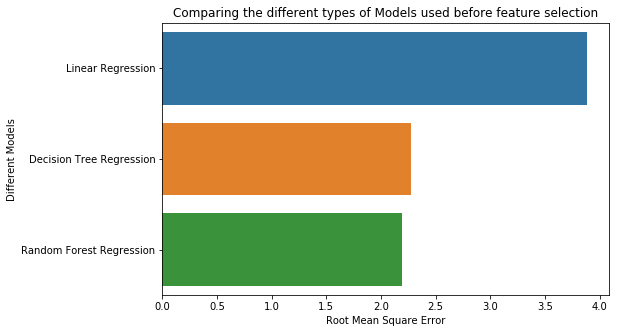

In [141]:
plt.figure(figsize=(8,5))
sns.barplot(df_model['RMSE'], df_model['Model'])
plt.xlabel("Root Mean Square Error")
plt.ylabel('Different Models')
plt.title('Comparing the different types of Models used before feature selection')

From above observation,we select Decision Tree Regressor.

In [138]:
#### Model comparsion after feature selection

df_model_1 = pd.DataFrame({"Model":['Linear Regression','Decision Tree Regression','Random Forest Regression'],"RMSE":[4.0688,2.271,2.2150]})
df_model_1

,Model,RMSE
0,Linear Regression,4.0688
1,Decision Tree Regression,2.2710
2,Random Forest Regression,2.2150


Text(0.5, 1.0, 'Comparing the different types of Models used after feature selection')

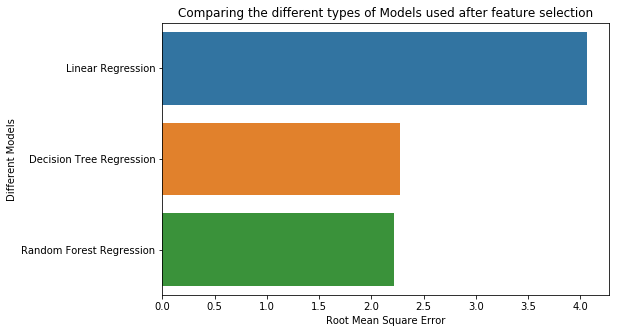

In [139]:
plt.figure(figsize=(8,5))
sns.barplot(df_model_1['RMSE'], df_model_1['Model'])
plt.xlabel("Root Mean Square Error")
plt.ylabel('Different Models')
plt.title('Comparing the different types of Models used after feature selection')

## Now with TEST Dataset

In [182]:
df_test = pd.read_csv("test.csv")
print("The shape of test data : {}".format(df_test.shape))

The shape of test data : (9914, 6)


In [183]:
df_test['passenger_count'].value_counts()

1    6914
2    1474
5     696
3     447
4     206
6     177
Name: passenger_count, dtype: int64

In [184]:
### Convert pickup_datetime from object to datetime object
df_test['pickup_datetime'] = pd.to_datetime(df_test['pickup_datetime'],format="%Y-%m-%d %H:%M:%S UTC",errors="coerce")

In [185]:
df_test['pickup_day'] = df_test['pickup_datetime'].dt.day
df_test['pickup_hour'] = df_test['pickup_datetime'].dt.hour
df_test['pickup_day_of_week'] = df_test['pickup_datetime'].dt.dayofweek ###The day of the week with Monday=0, Sunday=6
df_test['pickup_month'] = df_test['pickup_datetime'].dt.month
df_test['pickup_year'] =df_test['pickup_datetime'].dt.year

In [186]:
df_test['haversine_dist(km)']= haversine_np(df_test.pickup_longitude, df_test.pickup_latitude, df_test.dropoff_longitude, df_test.dropoff_latitude).astype('float')
df_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,haversine_dist(km)
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,27,13,1,1,2015,2.321801
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,27,13,1,1,2015,2.423830
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,8,11,5,10,2011,0.618239
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1,21,5,12,2012,1.959801
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,1,21,5,12,2012,5.383919


In [187]:
df_test.drop('pickup_datetime',axis=1,inplace= True)

In [189]:
### Now time to predict fare.
## Predict using Decision Tree Regression.
pred = dt_model.predict(df_test)

In [194]:
prediction = pd.DataFrame({"predicted_fare":pred})


In [198]:
prediction

,predicted_fare
0,9.243827
1,10.077562
2,4.379310
3,7.850595
4,14.055319
5,9.397037
6,5.190446
7,5.100000
8,10.866295
9,6.763158
